# [Double-Hard Debias: Tailoring Word Embeddings for Gender Bias Mitigation](https://arxiv.org/abs/2005.00965)

For more detailed explanations, please refer to the paper.

### Load embeddings

In [1]:
import codecs, os, json, operator, pickle
from random import shuffle
import numpy as np
from numpy import linalg as LA
import scipy

%load_ext autoreload
%autoreload 2

In [2]:
def load_glove(path):
    with open(path) as f:
        lines = f.readlines()
    
    wv = []
    vocab = []
    for line in lines:
        tokens = line.strip().split(" ")
        try:
            assert len(tokens) == 301
            vocab.append(tokens[0])
            wv.append([float(elem) for elem in tokens[1:]])
        except:
            print(line)
        
    w2i = {w: i for i, w in enumerate(vocab)}
    wv = np.array(wv).astype(float)
    print(len(vocab), wv.shape, len(w2i))
    
    return wv, w2i, vocab

def normalize(wv):
    
    # normalize vectors
    norms = np.apply_along_axis(LA.norm, 1, wv)
    wv = wv / norms[:, np.newaxis]
    return wv

def debias_gn(wv):
    for v in wv:
        assert(len(v) == 300)
    
    wv = wv[:,:-1]

    for v in wv:
        assert(len(v) == 299)
    return wv

In [6]:
# Baseline GloVe embeddings
glove, glove_w2i, vocab = load_glove("./data/vectors.txt")

# Below embeddings from from Zhao paper (GN-GloVe and GN-GloVe(W_a))
#gn_glove, gn_glove_w2i, gn_vocab = load_glove("./data/vectors300.txt")
#gn_glove_a = debias_gn(gn_glove)

# Hard GloVe and Strong Hard GloVe
# hd_glove, hd_glove_w2i, hd_vocab = load_glove(
#     "./data/vectors_hd.txt")
# hd_glove_a, hd_glove_a_w2i, hd_vocab_a = load_glove(
#     "./data/vectors_hd_a.txt")

# GP-GloVe and GP-GN-GloVe
# gp_glove, gp_glove_w2i, gp_vocab = load_glove(
#     "./data/gp_glove.txt")
# gp_gn_glove, gp_gn_glove_w2i, gp_gn_vocab = load_glove(
#     "./data/gp_gn_glove.txt")

322636 (322636, 300) 322636


In [7]:
def load_glove_p(path):
    # Modified from original because we did not pickle a map but rather wv_f directly
    wv = pickle.load(open(path, 'rb'))
    print(wv.shape)
        
    return wv
    
dhd_glove = load_glove_p("./data/dhd_glove_reproduce.p")
dhd_glove_w2i = glove_w2i
dhd_vocab = vocab

(322636, 300)


In [3]:
null_glove, null_glove_w2i, null_vocab = load_glove("./data/INLP_embeddings/vecs.150k.cleaned.txt")

314863 (314863, 300) 314863


In [4]:
def simi(a, b):
    return 1-scipy.spatial.distance.cosine(a, b)

### Word Embedding Utility: Analogy & Concept Categorization

In [36]:
from eval import evaluate_cate, evaluate_ana, evaluate_analogy_google, evaluate_analogy_msr

/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
evaluate_cate(glove, glove_w2i, vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['acne']" is assigned class illness
exist 401 in 402
Cluster purity on AP 0.5885286783042394
Sample data from ESSLI_2c, num of samples: 45 : "['acquire']" is assigned class exchange-exchange
exist 45 in 45
Cluster purity on ESSLI_2c 0.6
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.775
Sample data from ESSLI_1a, num of samples: 44 : "['bottle']" is assigned class tool-artifact
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "doll" is assigned class toy
exist 4125 in 5231
Cluster purity on Battig 0.4955151515151515
Sample data from BLESS, num of samples: 200 : "['carp']" is assigned class water_animal
exist 200 in 200
Cluster purity on BLESS 0.81


In [59]:
evaluate_ana(glove, glove_w2i, vocab)

6750
ACCURACY TOP1-MSR: 54.24% (3661/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.35% (4359/4524)
currency.txt:
ACCURACY TOP1: 6.58% (57/866)
city-in-state.txt:
ACCURACY TOP1: 72.64% (1792/2467)
family.txt:
ACCURACY TOP1: 87.35% (442/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.97% (208/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.94% (235/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.29% (1136/1332)
gram4-superlative.txt:
ACCURACY TOP1: 49.02% (550/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 63.16% (667/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 56.35% (879/1560)
gram8-plural.txt:
ACCURACY TOP1: 78.68% (1048/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.16% (506/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.48%  (7138/8869)
Syntactic accuracy: 62.76%  (6700/10675)
Total accuracy: 70.80%  (13838/19544)

Dataset created i

/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:143: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_left = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 0]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:144: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_right = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 1]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:147: FutureWarning: arrays to stack must be p

Analogy prediction accuracy on SemEval2012 0.1756625482532434


In [39]:
evaluate_cate(dhd_glove, dhd_glove_w2i, dhd_vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['acne']" is assigned class illness
exist 401 in 402
Cluster purity on AP 0.5960099750623441
Sample data from ESSLI_2c, num of samples: 45 : "['acquire']" is assigned class exchange-exchange
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.8250000000000001
Sample data from ESSLI_1a, num of samples: 44 : "['bottle']" is assigned class tool-artifact
exist 44 in 44
Cluster purity on ESSLI_1a 0.7272727272727273
Sample data from Battig, num of samples: 5231 : "doll" is assigned class toy
exist 4125 in 5231
Cluster purity on Battig 0.4661818181818182
Sample data from BLESS, num of samples: 200 : "['carp']" is assigned class water_animal
exist 200 in 200
Cluster purity on BLESS 0.795


In [60]:
evaluate_ana(dhd_glove, dhd_glove_w2i, dhd_vocab)

6750
ACCURACY TOP1-MSR: 53.81% (3632/6750)
capital-common-countries.txt:
ACCURACY TOP1: 96.44% (488/506)
capital-world.txt:
ACCURACY TOP1: 96.68% (4374/4524)
currency.txt:
ACCURACY TOP1: 6.00% (52/866)
city-in-state.txt:
ACCURACY TOP1: 74.67% (1842/2467)
family.txt:
ACCURACY TOP1: 83.60% (423/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 21.07% (209/992)
gram2-opposite.txt:
ACCURACY TOP1: 28.33% (230/812)
gram3-comparative.txt:
ACCURACY TOP1: 84.46% (1125/1332)
gram4-superlative.txt:
ACCURACY TOP1: 47.42% (532/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 62.88% (664/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.99% (1471/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 54.62% (852/1560)
gram8-plural.txt:
ACCURACY TOP1: 76.43% (1018/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 55.06% (479/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.94%  (7179/8869)
Syntactic accuracy: 61.64%  (6580/10675)
Total accuracy: 70.40%  (13759/19544)


/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:143: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_left = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 0]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:144: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_right = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 1]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:147: FutureWarning: arrays to stack must be p

Analogy prediction accuracy on SemEval2012 0.17303299182822926


In [37]:
evaluate_cate(null_glove, null_glove_w2i, null_vocab)

Calculating categorization benchmarks
Sample data from AP, num of samples: 402 : "['acne']" is assigned class illness
exist 401 in 402
Cluster purity on AP 0.600997506234414
Sample data from ESSLI_2c, num of samples: 45 : "['acquire']" is assigned class exchange-exchange
exist 45 in 45
Cluster purity on ESSLI_2c 0.5777777777777778
Sample data from ESSLI_2b, num of samples: 40 : "['chicken']" is assigned class HI
exist 40 in 40
Cluster purity on ESSLI_2b 0.7250000000000001
Sample data from ESSLI_1a, num of samples: 44 : "['bottle']" is assigned class tool-artifact
exist 44 in 44
Cluster purity on ESSLI_1a 0.75
Sample data from Battig, num of samples: 5231 : "doll" is assigned class toy
exist 4124 in 5231
Cluster purity on Battig 0.4917555771096023
Sample data from BLESS, num of samples: 200 : "['carp']" is assigned class water_animal
exist 200 in 200
Cluster purity on BLESS 0.81


In [38]:
evaluate_ana(null_glove, null_glove_w2i, null_vocab)

6750
ACCURACY TOP1-MSR: 52.09% (3516/6750)
capital-common-countries.txt:
ACCURACY TOP1: 95.26% (482/506)
capital-world.txt:
ACCURACY TOP1: 96.33% (4358/4524)
currency.txt:
ACCURACY TOP1: 4.73% (41/866)
city-in-state.txt:
ACCURACY TOP1: 75.23% (1856/2467)
family.txt:
ACCURACY TOP1: 81.23% (411/506)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 20.36% (202/992)
gram2-opposite.txt:
ACCURACY TOP1: 27.09% (220/812)
gram3-comparative.txt:
ACCURACY TOP1: 85.51% (1139/1332)
gram4-superlative.txt:
ACCURACY TOP1: 42.34% (475/1122)
gram5-present-participle.txt:
ACCURACY TOP1: 59.94% (633/1056)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 91.12% (1457/1599)
gram7-past-tense.txt:
ACCURACY TOP1: 53.85% (840/1560)
gram8-plural.txt:
ACCURACY TOP1: 74.02% (986/1332)
gram9-plural-verbs.txt:
ACCURACY TOP1: 58.85% (512/870)
Questions seen/total: 100.00% (19544/19544)
Semantic accuracy: 80.60%  (7148/8869)
Syntactic accuracy: 60.55%  (6464/10675)
Total accuracy: 69.65%  (13612/19544)


/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:143: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_left = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 0]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:144: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  prot_right = np.mean(np.vstack(w.get(word, mean_vector) for word in prototypes[:, 1]), axis=0)
/Users/david/opt/anaconda3/envs/double_hard/lib/python3.7/site-packages/web-0.0.1-py3.7.egg/web/evaluate.py:147: FutureWarning: arrays to stack must be p

Analogy prediction accuracy on SemEval2012 0.17765165972024588


## Gender Bias Evaluation:
### Restrict vocabulary

In [8]:
from tqdm import tqdm
from utils import limit_vocab

gender_specific = []

with open('./data/male_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
with open('./data/female_word_file.txt') as f:
    for l in f:
        gender_specific.append(l.strip())
print(len(gender_specific))

with codecs.open('./data/gender_specific_full.json') as f:
    gender_specific.extend(json.load(f))


exclude_words = gender_specific
print(len(exclude_words))

glove_vocab_limit, glove_limit, glove_w2i_limit = limit_vocab(glove, glove_w2i, vocab, exclude = exclude_words)

 40%|███▉      | 19787/50000 [00:00<00:00, 176813.06it/s]

442
1883


100%|██████████| 50000/50000 [00:00<00:00, 142497.64it/s]


size of vocabulary: 47628


In [9]:
dhd_vocab_limit, dhd_limit, dhd_w2i_limit = limit_vocab(
    dhd_glove, dhd_glove_w2i, dhd_vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 228047.23it/s]


size of vocabulary: 47628


In [10]:
null_vocab_limit, null_limit, null_w2i_limit = limit_vocab(
    null_glove, null_glove_w2i, null_vocab, exclude = exclude_words)

100%|██████████| 50000/50000 [00:00<00:00, 254371.36it/s]


size of vocabulary: 49646


### Select originally top biased words

In [11]:
he_embed = glove[glove_w2i['he'], :]
she_embed = glove[glove_w2i['she'], :]

def simi(a, b):
    return 1-scipy.spatial.distance.cosine(a, b)

def compute_bias_by_projection(wv, w2i, vocab):
    d = {}
    for w in vocab:
        u = wv[w2i[w], :]
        d[w] = simi(u, he_embed) - simi(u, she_embed)
    return d

gender_bias_bef = compute_bias_by_projection(glove_limit, glove_w2i_limit, glove_vocab_limit)
sorted_g = sorted(gender_bias_bef.items(), key=operator.itemgetter(1))

### TSNE visualization of originally top biased words

In [12]:
def visualize(vectors, y_true, y_pred, ax, title, random_state):
    
    # perform TSNE
    vectors = normalize(vectors)
    X_embedded = TSNE(n_components=2, random_state=random_state).fit_transform(vectors)
    for x,p,y in zip(X_embedded, y_pred, y_true):
        if y:
            ax.scatter(x[0], x[1], marker = '.', c = 'c')
        else:
            ax.scatter(x[0], x[1], marker = 'x', c = 'darkviolet')
    
    return ax

def cluster_and_visualize(words, X1, title, random_state, tsne_random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))
    
    fig, axs = plt.subplots(1, 1, figsize=(6, 3))
    ax1 = visualize(X1, y_true, y_pred_1, axs, title, tsne_random_state)
    
#     fig.savefig("a_{}_{}_{}.pdf".format(title, size, random_state))


In [13]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from utils import extract_vectors
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

size=500
female = [item[0] for item in sorted_g[:size]]
male = [item[0] for item in sorted_g[-size:]]
y_true = [1]*size + [0]*size

In [14]:
# You may change the random states to get more visualization result
random_state = 0
tsne_random_state = 5

precision 1.0


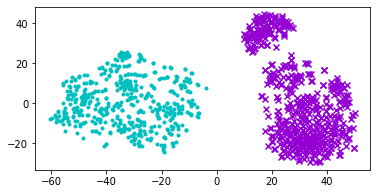

In [15]:
cluster_and_visualize(male + female, extract_vectors(male + female, glove_limit, glove_w2i_limit), 
                          'GloVe', random_state, tsne_random_state, y_true)

precision 0.741


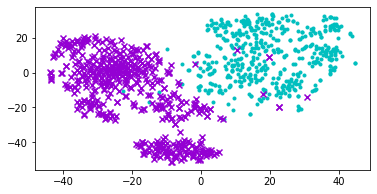

In [16]:
cluster_and_visualize(male + female, extract_vectors(male + female, dhd_limit, dhd_w2i_limit), 
                          'Double-Hard-GloVe', random_state, tsne_random_state, y_true)

precision 0.722


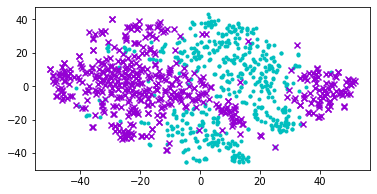

In [17]:
cluster_and_visualize(male + female, extract_vectors(male + female, null_limit, null_w2i_limit), 
                          'Double-Hard-Null It Out GloVe', random_state, tsne_random_state, y_true)

### Cluster originally top biased words
Following results may be slightly different from the numbers reported in the paper. This is due to:

1. how we select top biased words. Here, we select ones with largest similarities with **he** and **she** without normalizing embeddings, however, this may not be the perfect way. Other options can be:
    - normalize word embeddings first and then pick top biased words.
    - select according to projections on the difference vector of **he** and **she**.
2. different random state used in the clustering algorithm.

We care more about the relative clustering acc change and we see significant decrease with Double-Hard Debiased embeddings.

In [18]:
def cluster(words, X1, random_state, y_true, num=2):
    
    kmeans_1 = KMeans(n_clusters=num, random_state=random_state).fit(X1)
    y_pred_1 = kmeans_1.predict(X1)
    correct = [1 if item1 == item2 else 0 for (item1,item2) in zip(y_true, y_pred_1) ]
    print('precision', max(sum(correct)/float(len(correct)), 1 - sum(correct)/float(len(correct))))

In [19]:
# Cluster most biased words before and after debiasing

def my_cluster(wv, w2i, start=0, size=500, random_state = 1):
    
    if start == 0:
        female = [item[0] for item in sorted_g[:size]]
        male = [item[0] for item in sorted_g[-size:]]
    else:
        female = [item[0] for item in sorted_g[start:size+start]]
        male = [item[0] for item in sorted_g[-(start+size):-start]]

    y_true = [1]*size + [0]*size
    
    cluster(male + female, extract_vectors(male + female, wv, w2i), random_state, y_true)

In [20]:
random_state_=0
start=0
end=100
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)
my_cluster(null_limit, null_w2i_limit, start, end, random_state=random_state_)



precision 1.0
precision 0.665
precision 0.5900000000000001


In [21]:
random_state_=0
start=0
end=500
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)
my_cluster(null_limit, null_w2i_limit, start, end, random_state=random_state_)


precision 1.0
precision 0.741
precision 0.722


In [22]:
random_state_= 0
start=0
end=1000
my_cluster(glove_limit, glove_w2i_limit, start, end, random_state=random_state_)
my_cluster(dhd_limit, dhd_w2i_limit, start, end, random_state=random_state_)
my_cluster(null_limit, null_w2i_limit, start, end, random_state=random_state_)


precision 1.0
precision 0.704
precision 0.701


### Classification experiment

We also test classification experiment as described in [Lipstick on a Pig](https://arxiv.org/abs/1903.03862). However, we don't see any significant improvement on any debiasing approaches. We suspect that classification may not reflect gender bia correctly as it can always find a decision boundary with supervisions which may not be gender. 

In [23]:
from sklearn import svm
from random import shuffle
import random
from utils import train_and_predict

def cls(wv, w2i, vocab, size_train, size_test):
    size = size_train + size_test
    females = [item[0] for item in sorted_g[:size]]
    males = [item[0] for item in sorted_g[-size:]]
    males.reverse()

    shuffle(females)
    shuffle(males)

    train_and_predict(wv, w2i, vocab, size_train, size_test, males, females)

In [24]:
size_train=100
size_test=1000
cls(glove_limit, glove_w2i_limit, glove_vocab_limit, size_train, size_test)
cls(dhd_limit, dhd_w2i_limit, dhd_vocab_limit, size_train, size_test)
cls(null_limit, null_w2i_limit, null_vocab_limit, size_train, size_test)


accuracy: 1.0
accuracy: 0.929
accuracy: 0.701


### Association Experiments (Calisken et al.)

In [32]:
from utils import p_value_exhust, effect_size
from utils import WEAT_words

A = WEAT_words['A']
B = WEAT_words['B']
C = WEAT_words['C']
D = WEAT_words['D']
C = WEAT_words['E']
D = WEAT_words['F']
C = WEAT_words['G']
D = WEAT_words['H']

A = [elem.lower() for elem in A]
A = ['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
B = [elem.lower() for elem in B]
B = ['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
C = [elem.lower() for elem in C]
D = [elem.lower() for elem in D]
print(A)
print(B)
print(C)
print(D)

['john', 'paul', 'mike', 'kevin', 'steve', 'greg', 'jeff', 'tom']
['amy', 'joan', 'lisa', 'sarah', 'diana', 'kate', 'ann', 'donna']
['science', 'technology', 'physics', 'chemistry', 'einstein', 'nasa', 'experiment', 'astronomy']
['poetry', 'art', 'shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']


In [33]:
print(effect_size(A, B, C, D, glove, glove_w2i, vocab))
print(effect_size(A, B, C, D, dhd_glove, dhd_glove_w2i, dhd_vocab))
print(effect_size(A, B, C, D, null_glove, null_glove_w2i, null_vocab))

0.8793966839691493
-0.1496392289350194
0.13909625403038622


In [34]:
print(p_value_exhust(A, B, C, D, glove, glove_w2i, vocab))
print(p_value_exhust(A, B, C, D, dhd_glove, dhd_glove_w2i, dhd_vocab))
print(p_value_exhust(A, B, C, D, null_glove, null_glove_w2i, null_vocab))

num of samples 12870
0.03605283605283605
num of samples 12870
0.6142191142191142
num of samples 12870
0.39487179487179486
